<a href="https://colab.research.google.com/github/thiagogavioli/abtest/blob/main/EX_AB_AnalyzeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages

import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats import proportion as proptests

import matplotlib.pyplot as plt
% matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
data = pd.read_csv('homepage-experiment-data.csv')
data.tail(10)

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
19,20,1817,320,35,1780,315,23
20,21,1602,271,38,1588,256,44
21,22,1743,277,29,1861,341,37
22,23,1631,249,26,1517,272,35
23,24,1489,241,29,1466,279,31
24,25,1529,226,34,1609,284,29
25,26,1612,276,36,1574,295,38
26,27,1760,291,42,1666,297,28
27,28,1548,271,38,1587,314,37
28,29,1781,254,33,1728,290,41


**1 - Calculating p-vaue for the invariant metric**



In [45]:
#total number of observations
num_obs = data['Control Cookies'].sum() + data['Experiment Cookies'].sum()
num_obs

94197

In [5]:
#total number of control group
n_ctr = data['Control Cookies'].sum()
n_ctr

46851

In [7]:
#binomial test

p = 0.5
n_trials = 200000

samples = np.random.binomial(num_obs, p, n_trials)

In [13]:
#evaluating p-value
print(np.logical_or(samples <= n_ctr, samples > (num_obs - n_ctr)).mean())

0.106635


**2 -  Calculating p-value for download rate metric**



In [ ]:
#Hypoteses about difference in download for ctr and exp groups
#H0: exp - ctr <= 0
#H1: exp - ctr > 0

In [47]:
#number downloads / cookies for control group
ratio_dw_ctr = data['Control Downloads'].sum() / data['Control Cookies'].sum()
ratio_dw_ctr

0.16123455209067042

In [48]:
#number downloads / cookies for experiment group
ratio_dw_exp = data['Experiment Downloads'].sum() / data['Experiment Cookies'].sum()
ratio_dw_exp

0.180543234908968

In [50]:
#Real difference observed in proportion for exp and ctr groups
obs_diff = ratio_dw_exp - ratio_dw_ctr
obs_diff

0.01930868281829759

In [51]:
#Bootstrapping difference in proportion for ctr and exp groups
diffs = []

for _ in range(200000):
  sample = data.sample(data.shape[0], replace=True)
  ratio_dw_ctr = sample['Control Downloads'].sum() / sample['Control Cookies'].sum()
  ratio_dw_exp = sample['Experiment Downloads'].sum() / sample['Experiment Cookies'].sum()
  diffs.append(ratio_dw_exp - ratio_dw_ctr)

In [52]:
#transforming the Diffs list to a numpy array
diffs = np.array(diffs)

(array([6.0000e+01, 1.0360e+03, 8.7260e+03, 3.4035e+04, 6.3756e+04,
        5.9525e+04, 2.6646e+04, 5.6090e+03, 5.8400e+02, 2.3000e+01]),
 array([0.00828022, 0.01054003, 0.01279984, 0.01505965, 0.01731946,
        0.01957927, 0.02183908, 0.02409889, 0.0263587 , 0.02861851,
        0.03087832]),
 <a list of 10 Patch objects>)

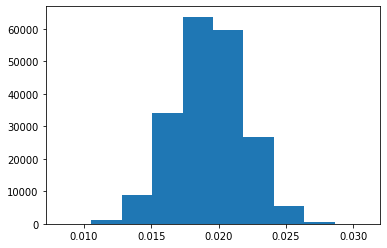

In [53]:
#Plot the differences 
plt.hist(diffs)

In [54]:
#Generating values centered at 0 and std from Diffs
null_vals = np.random.normal(0, np.std(diffs), 10000)

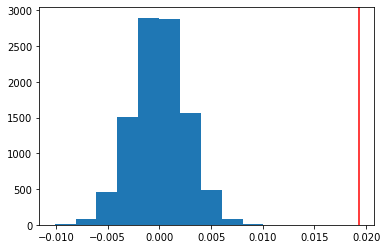

In [55]:
#Checking our statistic in the distribution
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [56]:
#Calculation the p-value
(null_vals >= obs_diff).mean()

0.0

**3 - Calculating p-value for purchase metric**



In [57]:
#Hypoteses about difference in download for ctr and exp groups
#H0: exp - ctr <= 0
#H1: exp - ctr > 0

In [60]:
#number purchases / cookies for control group
ratio_pc_ctr = data['Control Licenses'].sum() / data['Control Cookies'].iloc[0:21].sum()
ratio_pc_ctr

0.021032051661828307

In [61]:
#number purchases / cookies for experiment group
ratio_pc_exp = data['Experiment Licenses'].sum() / data['Experiment Cookies'].iloc[0:21].sum()
ratio_pc_exp

0.021317490826489604

In [62]:
#Real difference observed in proportion for exp and ctr groups
obs_diff = ratio_pc_exp - ratio_pc_ctr
obs_diff

0.00028543916466129693

In [63]:
#Bootstrapping difference in proportion for ctr and exp groups
diffs = []

for _ in range(200000):
  sample = data.sample(data.shape[0], replace=True)
  ratio_pc_ctr = sample['Control Licenses'].sum() / sample['Control Cookies'].iloc[0:21].sum()
  ratio_pc_exp = sample['Experiment Licenses'].sum() / sample['Experiment Cookies'].iloc[0:21].sum()
  diffs.append(ratio_pc_exp - ratio_pc_ctr)

In [65]:
#transforming the Diffs list to a numpy array
diffs = np.array(diffs)

(array([6.6000e+01, 8.3900e+02, 7.1350e+03, 2.9756e+04, 6.2512e+04,
        6.2674e+04, 2.9992e+04, 6.4090e+03, 5.8900e+02, 2.8000e+01]),
 array([-0.00372244, -0.00289139, -0.00206033, -0.00122927, -0.00039822,
         0.00043284,  0.0012639 ,  0.00209495,  0.00292601,  0.00375706,
         0.00458812]),
 <a list of 10 Patch objects>)

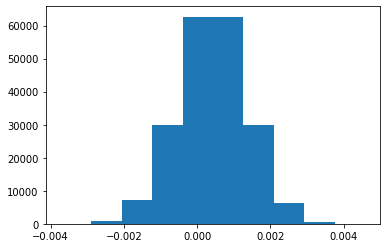

In [66]:
#Plot the differences 
plt.hist(diffs)

In [68]:
#Generating values centered at 0 and std from Diffs
null_vals = np.random.normal(0, np.std(diffs), 200000)

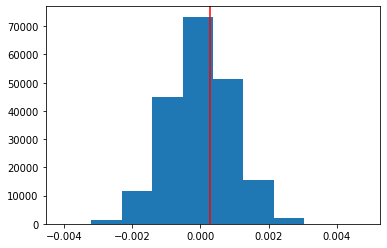

In [69]:
#Checking our statistic in the distribution
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [70]:
#Calculation the p-value
(null_vals >= obs_diff).mean()

0.37776